Tugas PCD Program Konvolusi Spasial Citra

In [29]:
# use virtual environment
# venv/Scripts/activate

# install library
# pip install matplotlib opencv-python numpy scipy

# import library
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy import signal

# membaca file gambar
image = cv2.imread('rrqbb.webp', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(np.float64(-0.5), np.float64(799.5), np.float64(449.5), np.float64(-0.5))

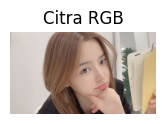

In [16]:
# Menampilkan file gambar (Citra RGB)
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Citra RGB')
plt.axis('off')

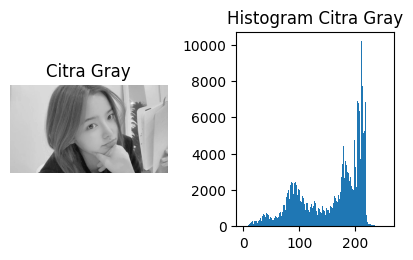

In [19]:
# Mengubah citra RGB menjadi grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menampilkan gambar grayscale
plt.subplot(2, 3, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Citra Gray')
plt.axis('off')

# Menampilkan histogram citra
plt.subplot(2, 3, 3)
plt.hist(image_gray.ravel(), bins=256, range=[0, 256])
plt.title('Histogram Citra Gray')
plt.tight_layout()
plt.show()

In [20]:
# Konvolusi spasial menggunakan 2 jenis kernel/mask/filter
# Kernel 1 (Gausian)
kernel1 = np.array([[1, 2, 1],
                    [2,  4, 2],
                    [1, 2, 1]])
# gausian 121, 242, 121
# Kernel 2 (Sobel vertikal & horizontal)
kernel2 = np.array([[1,  2,  1],
                    [0,  0,  0],
                    [-1, -2, -1]])

# Melakukan konvolusi dengan kernel 1
convolved1 = convolve(image_gray, kernel1)

# Melakukan konvolusi dengan kernel 2
convolved2 = convolve(image_gray, kernel2)

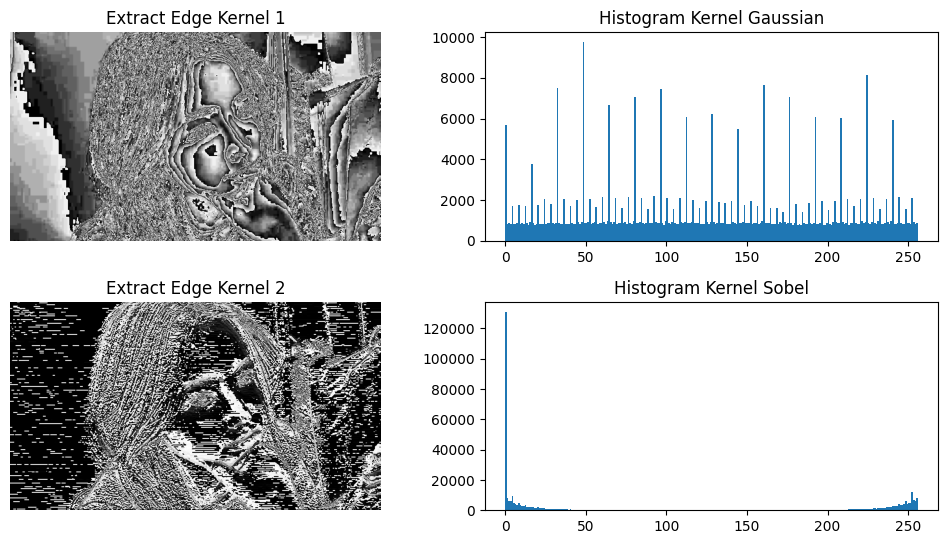

In [27]:
# Mengubah layout menjadi 3x2 untuk menampung semua subplot
plt.figure(figsize=(10, 8))  # Mengatur ukuran gambar

# Menampilkan hasil konvolusi dengan kernel 1
plt.subplot(3, 2, 1)
plt.imshow(convolved1, cmap='gray')
plt.title('Extract Edge Kernel 1')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.hist(convolved1.ravel(), bins=256, range=[0, 256])
plt.title('Histogram Kernel Gaussian')

# Menampilkan hasil konvolusi dengan kernel 2
plt.subplot(3, 2, 3)
plt.imshow(convolved2, cmap='gray')
plt.title('Extract Edge Kernel 2')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.hist(convolved2.ravel(), bins=256, range=[0, 256])
plt.title('Histogram Kernel Sobel')

plt.tight_layout()
plt.show()


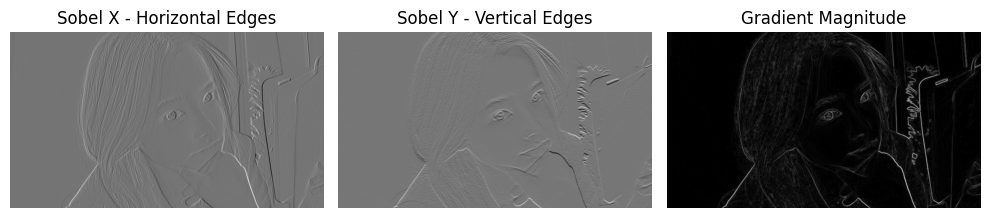

In [30]:
# Mendefinisikan kernel Sobel untuk deteksi tepi horizontal (sobel_x) dan vertikal (sobel_y)
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# Menghitung konvolusi dengan kernel Sobel
convolved_x = signal.convolve2d(image_gray, sobel_x, boundary='symm', mode='same')
convolved_y = signal.convolve2d(image_gray, sobel_y, boundary='symm', mode='same')

# Menghitung magnitude gradien kombinasi sobel_x dan sobel_y
gradient_magnitude = np.sqrt(convolved_x**2 + convolved_y**2)

# Menampilkan hasil konvolusi
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(convolved_x, cmap='gray')
plt.title('Sobel X - Horizontal Edges')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(convolved_y, cmap='gray')
plt.title('Sobel Y - Vertical Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()